# Theoretical Uncertainties in the SPS model 
In this notebook I will quantify the theoretical uncertainties in SPS models by comparing the SEDs constructed using different spectral and isochrone libraries

In [1]:
import os,sys
import h5py
import numpy as np
# -- provabgs --
from provabgs import infer as Infer
from provabgs import models as Models

In [2]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## read in ($\theta$, SED $f_\lambda$)  constructed using the fiducial setup
The fiducial setup uses a **MILES spectral and MIST isochrones libraries**. This sample has SPS parameters that generate SEDs that fall within the rough color cuts of BGS

In [3]:
dat_dir = '/Users/chahah/data/arcoiris/provabgs_cnf/'

ftheta = os.path.join(dat_dir, 'train.set0.thetas.npy')
thetas = np.load(ftheta)

flssps = os.path.join(dat_dir, 'train.set0.miles_mist.lssp.lssps.npy')
lssps_fid = np.load(flssps)

fwaves = os.path.join(dat_dir, 'train.set0.miles_mist.lssp.waves.npy')
waves_fid = np.load(fwaves)

In [4]:
waves = waves_fid[0]

In [5]:
print(thetas.shape)

(29154, 13)


# compare fiducial SEDs to SEDs using different isochrone libraries

In [6]:
lssps_m2 = np.load(os.path.join(dat_dir, 'train.set0.miles_pdva.lssp.lssps.npy'))
lssps_m3 = np.load(os.path.join(dat_dir, 'train.set0.miles_prsc.lssp.lssps.npy'))
lssps_m4 = np.load(os.path.join(dat_dir, 'train.set0.miles_bsti.lssp.lssps.npy'))

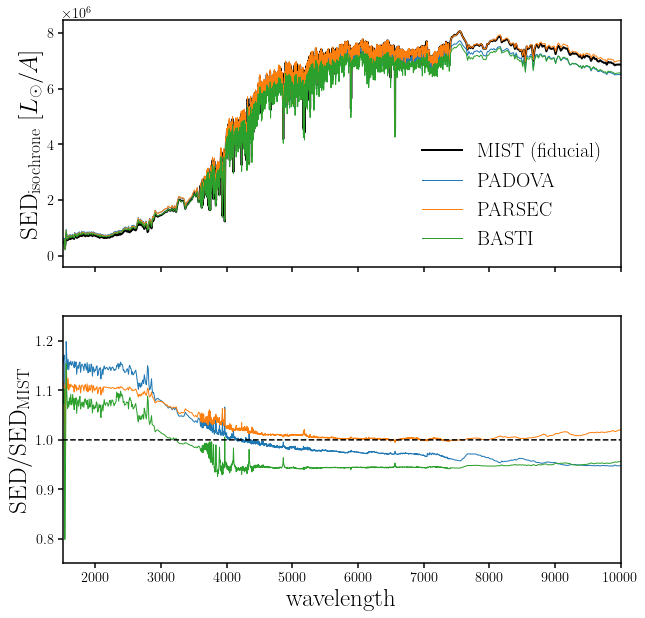

In [19]:
fig = plt.figure(figsize=(10,10))
sub = fig.add_subplot(211)
sub.plot(waves, lssps_fid[0], c='k', lw=2, label='MIST (fiducial)')
sub.plot(waves, lssps_m2[0], c='C0', lw=1, label='PADOVA')
sub.plot(waves, lssps_m3[0], c='C1', lw=1, label='PARSEC')
sub.plot(waves, lssps_m4[0], c='C2', lw=1, label='BASTI')
sub.legend(loc='lower right', fontsize=20)
#sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1.5e3, 1e4)
sub.set_xticklabels([])
sub.set_ylabel(r'${\rm SED}_{\rm isochrone}$ [$L_\odot/A$]', fontsize=25)

sub = fig.add_subplot(212)
sub.plot(waves, lssps_m2[0]/lssps_fid[0], c='C0', lw=1, label='MILES, Padova')
sub.plot(waves, lssps_m3[0]/lssps_fid[0], c='C1', lw=1, label='MILES, PARSEC')
sub.plot(waves, lssps_m4[0]/lssps_fid[0], c='C2', lw=1, label='MILES, BaSTI')
sub.plot(waves, np.ones(len(waves)), c='k', ls='--')
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1.5e3, 1e4)
sub.set_ylabel(r'${\rm SED} / {\rm SED}_{\rm MIST}$', fontsize=25)
sub.set_ylim(0.75, 1.25)
fig.savefig('../doc/paper/figs/sed_isochrone.pdf', bbox_inches='tight')

There are clearly some significant wavelength-dependent differents for the different isochrone libraries...

## SED ratios

In [16]:
lssp_ratios_m2 = lssps_m2/lssps_fid 
lssp_ratios_m3 = lssps_m3/lssps_fid
lssp_ratios_m4 = lssps_m4/lssps_fid

In [17]:
lssp_ratios_m2_q = np.quantile(lssp_ratios_m2, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)
lssp_ratios_m3_q = np.quantile(lssp_ratios_m3, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)
lssp_ratios_m4_q = np.quantile(lssp_ratios_m4, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)

(0.0, 2.0)

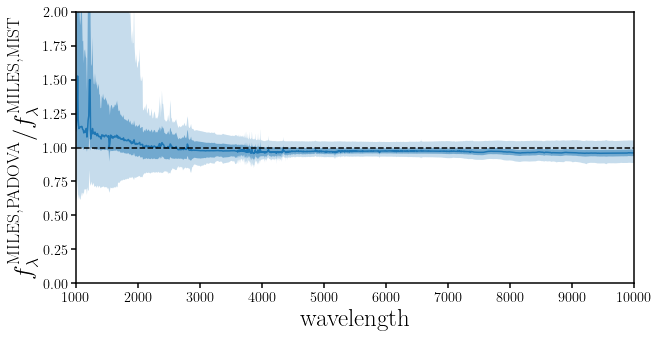

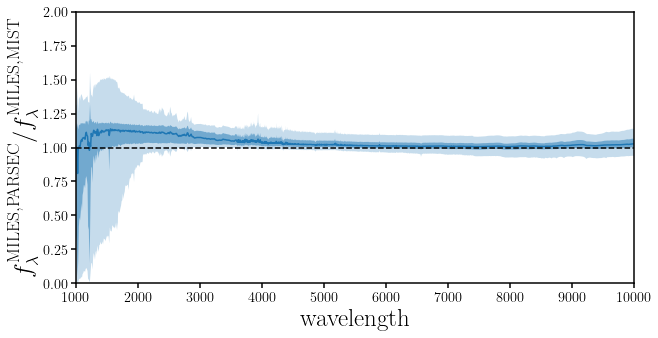

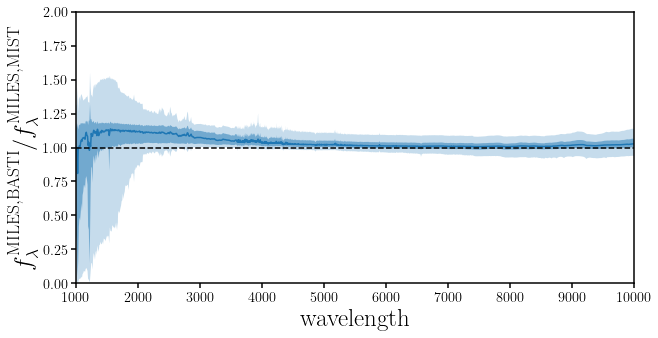

In [18]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(waves, lssp_ratios_m2_q[0], lssp_ratios_m2_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(waves, lssp_ratios_m2_q[1], lssp_ratios_m2_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(waves, lssp_ratios_m2_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm MILES, PADOVA}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(waves, lssp_ratios_m3_q[0], lssp_ratios_m3_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(waves, lssp_ratios_m3_q[1], lssp_ratios_m3_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(waves, lssp_ratios_m3_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')

sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm MILES, PARSEC}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(waves, lssp_ratios_m3_q[0], lssp_ratios_m3_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(waves, lssp_ratios_m3_q[1], lssp_ratios_m3_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(waves, lssp_ratios_m3_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')

sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm MILES, BASTI}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

The differences are quite dramatic for UV wavelengths

# compare fiducial SEDs to SEDs using different spectral libraries

In [19]:
waves_mm2 = np.load(os.path.join(dat_dir, 'train.set0.basel_mist.lssp.waves.npy'))
lssps_mm2 = np.load(os.path.join(dat_dir, 'train.set0.basel_mist.lssp.lssps.npy'))

In [22]:
waves2 = waves_mm2[0]

Text(0, 0.5, 'SED')

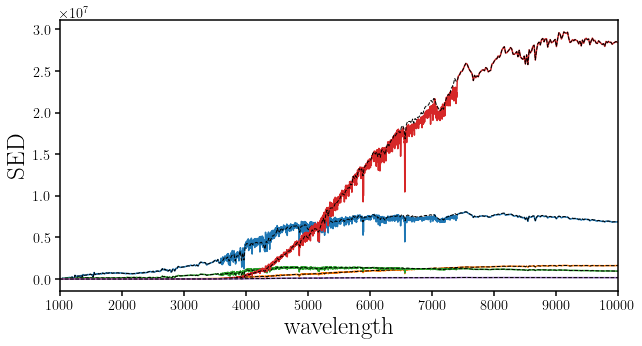

In [24]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for i in range(5): 
    sub.plot(waves, lssps_fid[i], c='C%i' % i)
    sub.plot(waves2, lssps_mm2[i], c='k', ls='--', lw=1)
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel('SED', fontsize=25)

In [31]:
lssp_ratios_mm2 = np.array([lssps_mm2[i]/np.interp(waves2, waves, lssps_fid[i]) for i in range(lssps_fid.shape[0])])

In [32]:
lssp_ratios_mm2_q = np.quantile(lssp_ratios_mm2, [0.025, 0.16, 0.5, 0.84, 0.975], axis=0)

(0.0, 2.0)

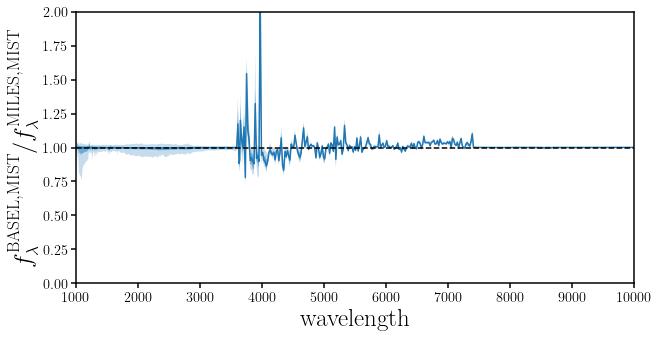

In [33]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.fill_between(waves2, lssp_ratios_mm2_q[0], lssp_ratios_mm2_q[-1], facecolor='C0', edgecolor='none', alpha=0.25)
sub.fill_between(waves2, lssp_ratios_mm2_q[1], lssp_ratios_mm2_q[-2], facecolor='C0', edgecolor='none', alpha=0.5)
sub.plot(waves2, lssp_ratios_mm2_q[2], c='C0')
sub.plot([1e3, 1e4], [1., 1.], c='k', ls='--')
sub.set_xlabel('wavelength', fontsize=25)
sub.set_xlim(1e3, 1e4)
sub.set_ylabel(r'$f_\lambda^{\rm BASEL, MIST}/f_\lambda^{\rm MILES, MIST}$', fontsize=25)
sub.set_ylim(0., 2.)

There isn't a significant bias from using a different spectral library but there seems to be a significant scatter.